In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers

In [116]:
df = pd.read_csv("spectral_functions.csv")

In [117]:
df.head()

,754.3,740.2,726.7,713.9,701.7,690,678.9,668.2,658,648.2,...,339.3,338.3,337.3,336.3,335.4,334.4,333.5,332.5,331.6,Id
0,0.15,0.50,0.92,1.58,2.71,4.03,5.42,6.67,7.66,8.29,...,-0.11,0.00,0.00,-0.01,0.04,0.10,0.13,0.01,-0.03,DFBSJ142114.64+425823.6
1,0.15,0.37,1.11,2.54,4.54,7.08,10.33,13.98,16.99,17.65,...,0.11,0.19,0.19,0.18,0.06,0.09,0.20,0.15,-0.01,DFBSJ142122.01+425921.3
2,2.06,2.36,2.48,2.40,2.06,1.83,2.01,2.32,2.38,2.28,...,-0.05,0.05,0.10,0.05,-0.05,-0.10,-0.08,-0.04,0.06,DFBSJ142125.68+425138.2
3,-0.05,0.11,0.52,1.08,1.80,2.50,3.31,4.63,5.95,5.94,...,0.39,0.20,0.10,0.27,0.45,0.34,0.19,0.21,0.21,DFBSJ142126.80+425301.4
4,0.13,0.09,0.01,0.09,0.24,0.31,0.35,0.36,0.47,0.53,...,-0.10,0.01,0.10,0.01,-0.25,-0.32,-0.11,0.11,0.19,DFBSJ142141.43+430014.5


In [118]:
df = df.drop(["Id"], axis = 1)

In [119]:
X = df.values

In [120]:
X

array([[ 0.15,  0.5 ,  0.92, ...,  0.13,  0.01, -0.03],
       [ 0.15,  0.37,  1.11, ...,  0.2 ,  0.15, -0.01],
       [ 2.06,  2.36,  2.48, ..., -0.08, -0.04,  0.06],
       ...,
       [ 0.09,  0.14,  0.36, ...,  0.01, -0.03, -0.05],
       [ 0.8 ,  0.83,  0.92, ..., -0.01,  0.02,  0.03],
       [ 0.2 ,  0.39,  0.9 , ...,  1.23,  1.24,  1.37]])

In [121]:
X.shape

(1008, 117)

In [122]:
for i in range(len(X)):
    arr = X[i]
    arr=(arr-arr.min())/(arr.max()-arr.min())
    X[i] = arr

In [123]:
x_train = X[0: 800:]
x_test = X[800: 1008:]

x_train.shape
x_test.shape

(208, 117)

In [164]:
inpu_dim = 117
hidden_dim = 64
encoding_dim = 4

In [165]:
input_vect = Input(shape = (inpu_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_vect)
decoded = Dense(inpu_dim)(encoded)

autoencoder = Model(input_vect, decoded)
encoder = Model(input_vect, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [166]:
adadelta = optimizers.Adadelta(lr=1.0, rho=0.95)

In [167]:
autoencoder.compile(optimizer=adadelta, loss = "MSE",metrics=['mean_squared_error'])

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs = 2000, batch_size = 128, shuffle=True, validation_data=(x_test, x_test))

Train on 800 samples, validate on 208 samples
Epoch 1/2000
800/800 [==============================] - 0s 507us/step - loss: 0.1679 - mean_squared_error: 0.1679 - val_loss: 0.1585 - val_mean_squared_error: 0.1585
Epoch 2/2000
800/800 [==============================] - 0s 32us/step - loss: 0.1616 - mean_squared_error: 0.1616 - val_loss: 0.1526 - val_mean_squared_error: 0.1526
Epoch 3/2000
800/800 [==============================] - 0s 32us/step - loss: 0.1555 - mean_squared_error: 0.1555 - val_loss: 0.1470 - val_mean_squared_error: 0.1470
Epoch 4/2000
800/800 [==============================] - 0s 30us/step - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 5/2000
800/800 [==============================] - 0s 31us/step - loss: 0.1442 - mean_squared_error: 0.1442 - val_loss: 0.1365 - val_mean_squared_error: 0.1365
Epoch 6/2000
800/800 [==============================] - 0s 27us/step - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 0.1

800/800 [==============================] - 0s 31us/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 51/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 52/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 53/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 54/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 55/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 56/2000
800/

800/800 [==============================] - 0s 27us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 100/2000
800/800 [==============================] - 0s 28us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 101/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 102/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 103/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 104/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 105/200

800/800 [==============================] - 0s 29us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 149/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 150/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 151/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 152/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 153/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 154/200

800/800 [==============================] - 0s 30us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 198/2000
800/800 [==============================] - 0s 34us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 199/2000
800/800 [==============================] - 0s 32us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 200/2000
800/800 [==============================] - 0s 34us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 201/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 202/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 203/200

800/800 [==============================] - 0s 29us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 247/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 248/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 249/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 250/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 251/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 252/200

800/800 [==============================] - 0s 31us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 296/2000
800/800 [==============================] - 0s 26us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 297/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 298/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 299/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 300/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 301/200

800/800 [==============================] - 0s 29us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 345/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 346/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 347/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 348/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 349/2000
800/800 [==============================] - 0s 26us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 350/200

800/800 [==============================] - 0s 31us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 394/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 395/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 396/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 397/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 398/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 399/200

800/800 [==============================] - 0s 30us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 443/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 444/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 445/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 446/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 447/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 448/200

800/800 [==============================] - 0s 26us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 492/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 493/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 494/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 495/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 496/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 497/200

800/800 [==============================] - 0s 27us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 541/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 542/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 543/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 544/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 545/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 546/200

800/800 [==============================] - 0s 32us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 590/2000
800/800 [==============================] - 0s 35us/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 591/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 592/2000
800/800 [==============================] - 0s 32us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 593/2000
800/800 [==============================] - 0s 34us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 594/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 595/200

800/800 [==============================] - 0s 26us/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 639/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 640/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 641/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 642/2000
800/800 [==============================] - 0s 26us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 643/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 644/200

800/800 [==============================] - 0s 32us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 688/2000
800/800 [==============================] - 0s 35us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 689/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 690/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 691/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 692/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 693/200

800/800 [==============================] - 0s 31us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 737/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 738/2000
800/800 [==============================] - 0s 26us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 739/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 740/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 741/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 742/200

800/800 [==============================] - 0s 27us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 786/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 787/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 788/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 789/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 790/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 791/200

800/800 [==============================] - 0s 29us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 835/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 836/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 837/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 838/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 839/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 840/200

800/800 [==============================] - 0s 29us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 884/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 885/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 886/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 887/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 888/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 889/200

800/800 [==============================] - 0s 27us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 933/2000
800/800 [==============================] - 0s 31us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 934/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 935/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 936/2000
800/800 [==============================] - 0s 30us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 937/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 938/200

800/800 [==============================] - 0s 31us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 982/2000
800/800 [==============================] - 0s 27us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 983/2000
800/800 [==============================] - 0s 26us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 984/2000
800/800 [==============================] - 0s 29us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 985/2000
800/800 [==============================] - 0s 26us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 986/2000
800/800 [==============================] - 0s 25us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 987/200

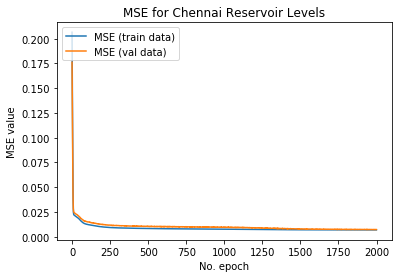

In [154]:
plt.plot(history.history['mean_squared_error'], label='MSE (train data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()



In [155]:
encoded_values = encoder.predict(x_test)
decoded_values = decoder.predict(encoded_values)

In [156]:
encoded_values.shape

(208, 16)

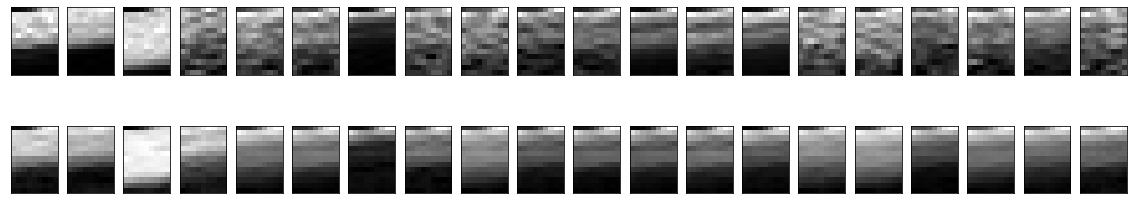

In [157]:
n = 20
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(13,9))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_values[i].reshape(13,9))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [158]:
result_pred = encoder.predict(X);

In [159]:
kmeans_df = pd.DataFrame(result_pred);

In [160]:
kmeans_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,2.212793,1.786385,1.983154,0.0,2.786340,2.229742,0.0,0.044132,0.609946,0.737858,0.0,0.0,0.0,0.0,0.0
1,0.0,2.518121,2.552840,2.239075,0.0,3.465487,2.736569,0.0,0.000000,0.750926,1.008067,0.0,0.0,0.0,0.0,0.0
2,0.0,1.112326,0.527284,2.407843,0.0,2.519131,1.070711,0.0,0.001727,1.487664,0.354740,0.0,0.0,0.0,0.0,0.0
3,0.0,2.032780,1.303391,1.728276,0.0,2.467013,2.140825,0.0,0.020206,0.502611,0.671929,0.0,0.0,0.0,0.0,0.0
4,0.0,2.078665,2.665940,2.229673,0.0,2.785260,2.240770,0.0,0.060911,2.205684,0.768634,0.0,0.0,0.0,0.0,0.0


In [161]:
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

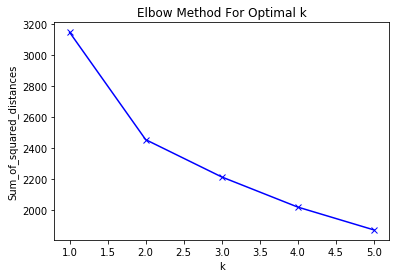

In [162]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

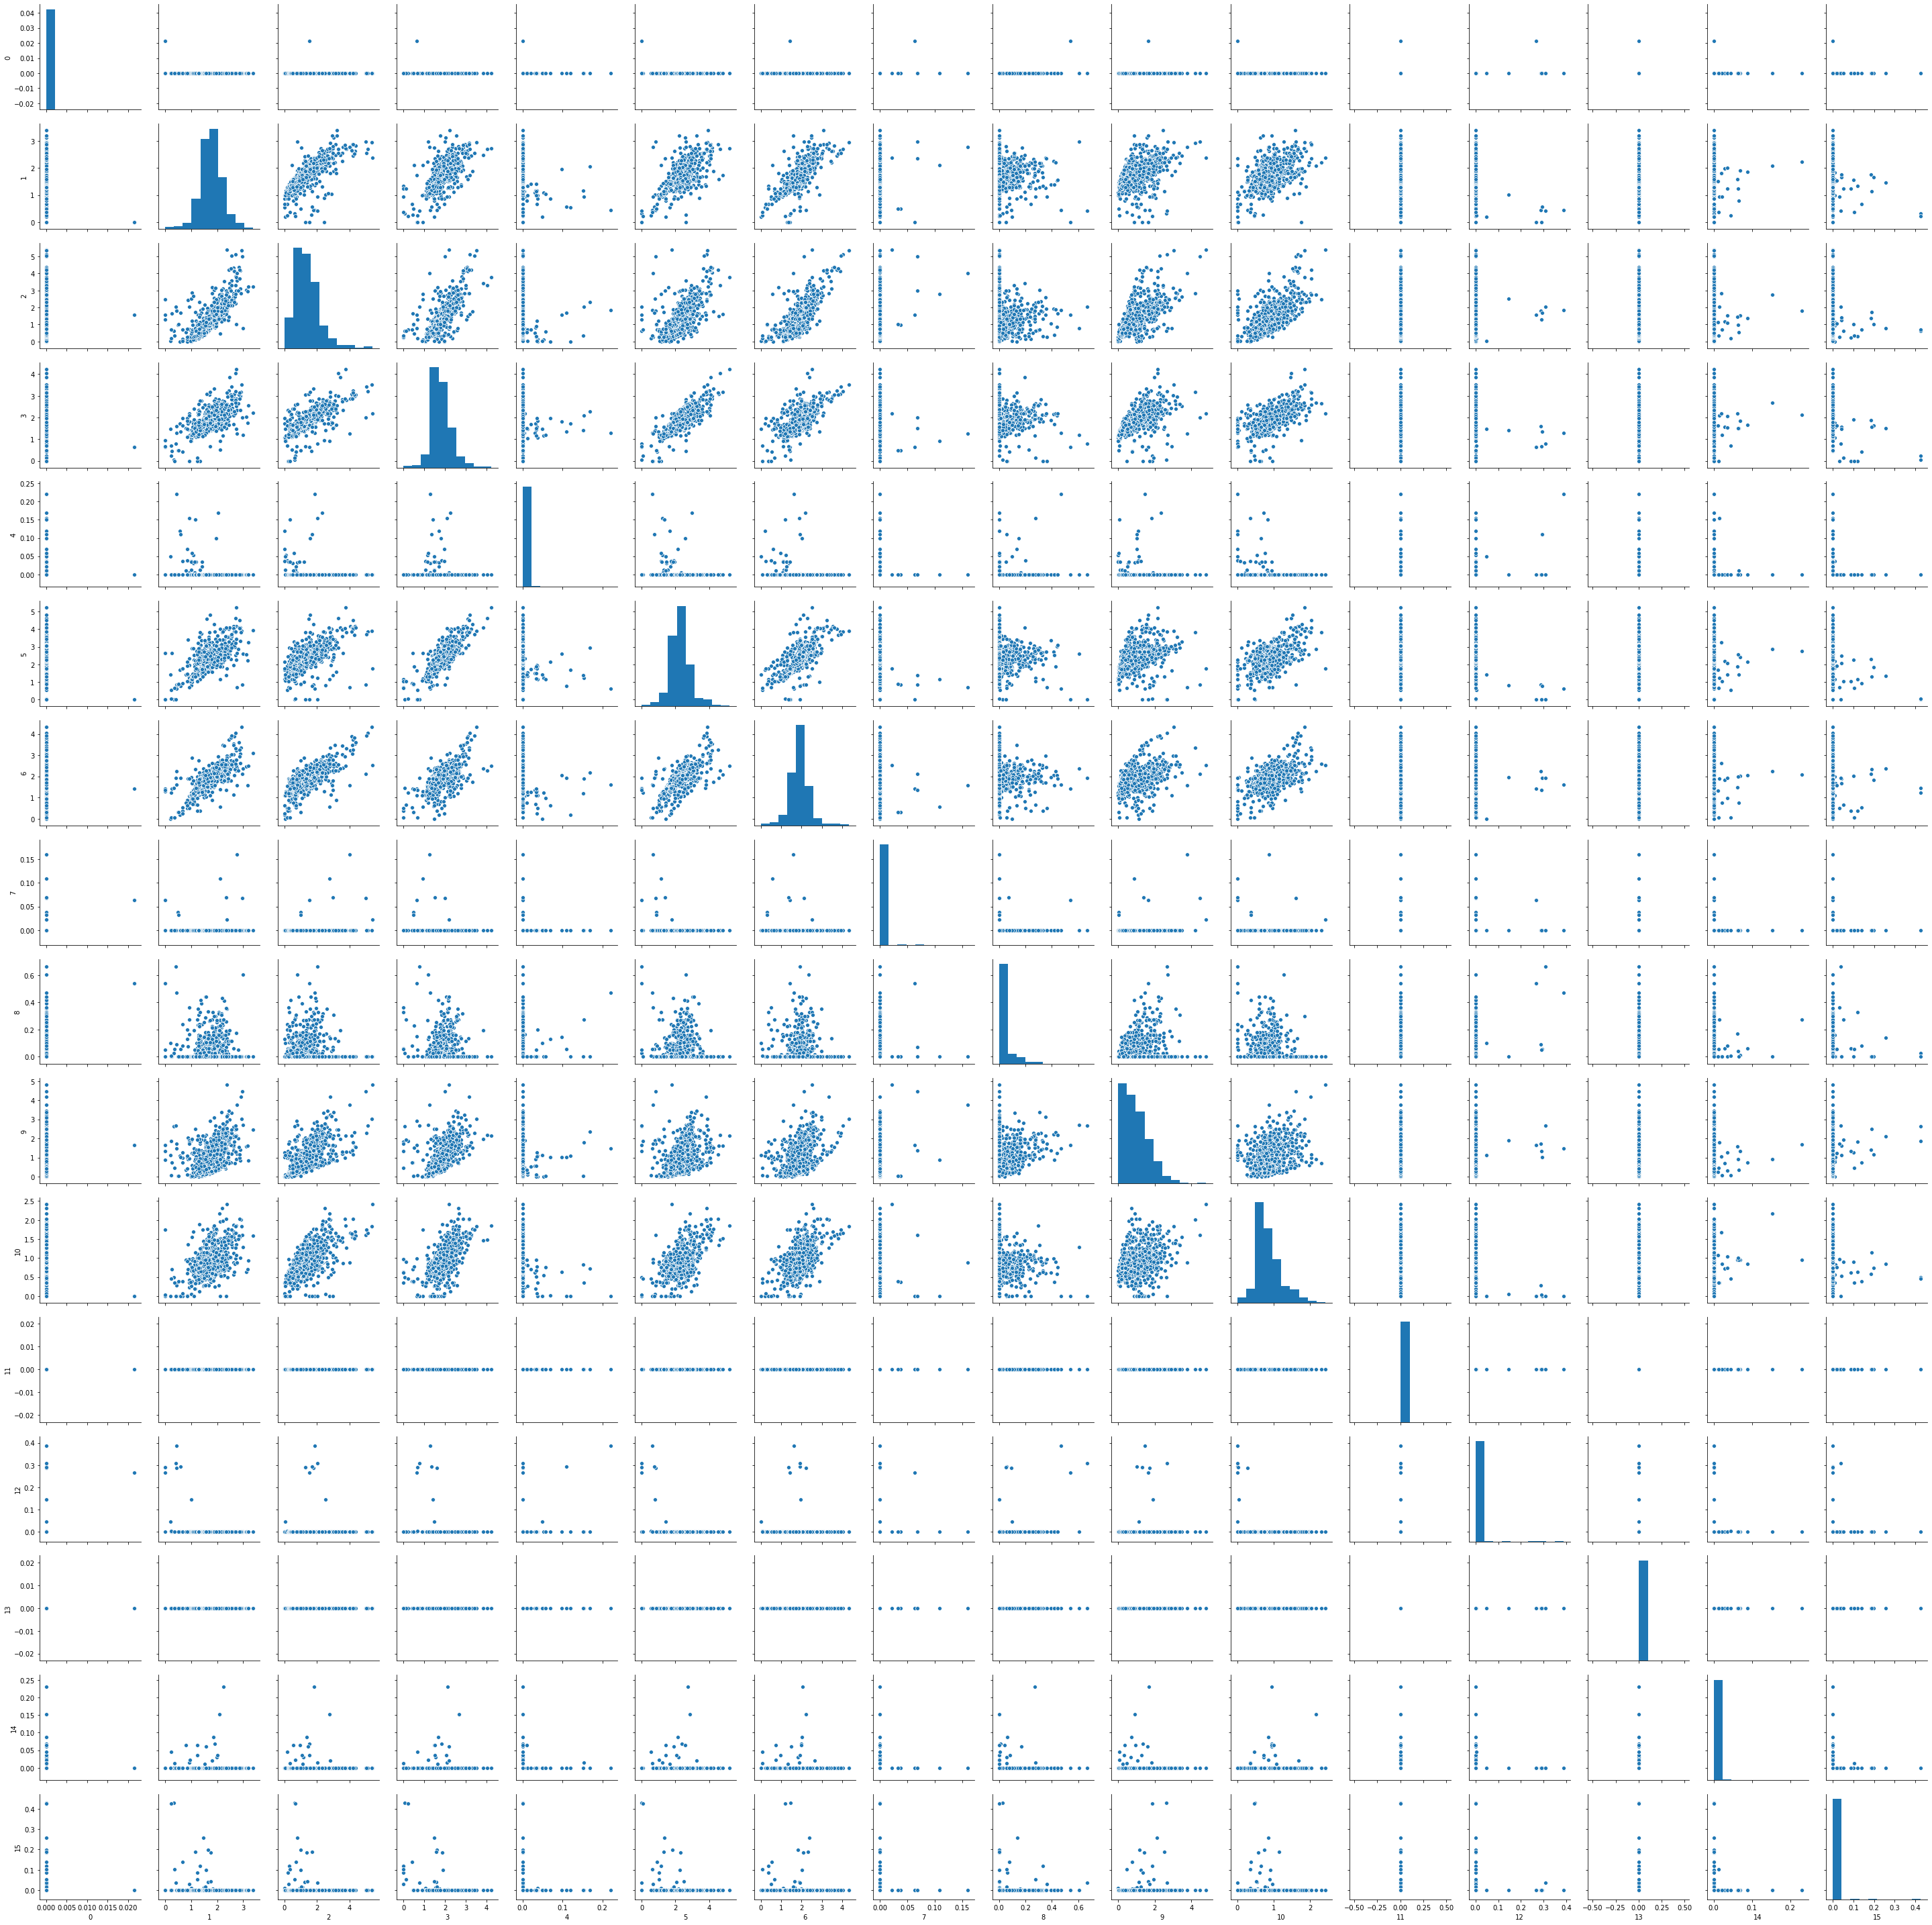

In [163]:
sns.pairplot(kmeans_df)